#📌 Extracción

In [1]:
!pip install plotly --upgrade
!pip install -U kaleido
!plotly_get_chrome
import plotly.express as px
import plotly.io as pio
from IPython.display import Image


Plotly will install a copy of Google Chrome to be used for generating static images of plots.
Chrome will be installed at: /usr/local/lib/python3.11/dist-packages/choreographer/cli/browser_exe
Do you want to proceed? [y/n] y
Installing Chrome for Plotly...
Chrome installed successfully.
The Chrome executable is now located at: /usr/local/lib/python3.11/dist-packages/choreographer/cli/browser_exe/chrome-linux64/chrome


In [2]:
import requests
import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [4]:
from pandas import json_normalize

df_normalizado = json_normalize(data) # Normalizamos el JSON e imprimimos el resto de las columnas
print(df_normalizado.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [5]:
df_normalizado.info() # Analizamos cada columna con su Dtype correspondiente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformación

##**Conociendo el conjunto de datos**

In [6]:
df_normalizado.head() # Analizamos el contenido de cada columna

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##**Comprobación de incoherencias en los datos**

In [7]:
# Verificamos si existen valores únicos en cada columna
for col in df_normalizado.columns:
    print(f"valores únicos en la columna'{col}': {df_normalizado[col].nunique()}")
    if df_normalizado[col].nunique() < 50: # Imprime los valores solamente si no excede
      print(df_normalizado[col].unique())
      print('-' * 50) # Imprime linea divisoria para mejor visualización


valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

In [8]:
# Verificamos si hay datos duplicados
duplicados = df_normalizado.duplicated().sum()
print(f"Numero de lineas duplicadas: {duplicados}")

Numero de lineas duplicadas: 0


In [9]:
# Verificamos si hay valores nulos
nulos = df_normalizado.isnull().values.sum()
print("\nNumero de valores nulos por columna:")
print(nulos[nulos > 0])


Numero de valores nulos por columna:
[]


In [10]:
# Vereficamos si hay valores blancos o vacios
valores_blanco_o_vacio = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores blancos o vacios por columna:")
print(valores_blanco_o_vacio[valores_blanco_o_vacio > 0])


Valores blancos o vacios por columna:
Churn                    224
account.Charges.Total     11
dtype: int64


In [11]:
# Modificamos la columna 'account.Charges.Total' a Float
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')
print(df_normalizado['account.Charges.Total'].dtype)

float64


In [12]:
# Eliminamos las filas con valores vacíos en la columna 'Churn'

df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df_normalizado))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [13]:
# Visualizamos para verificar los cambios realizados
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


##**Creación de columna de [Cuentas Diarias]**

In [14]:
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30
print(df_normalizado[['account.Charges.Monthly', 'Cuentas_Diarias']])

      account.Charges.Monthly  Cuentas_Diarias
0                       65.60         2.186667
1                       59.90         1.996667
2                       73.90         2.463333
3                       98.00         3.266667
4                       83.90         2.796667
...                       ...              ...
7262                    55.15         1.838333
7263                    85.10         2.836667
7264                    50.30         1.676667
7265                    67.85         2.261667
7266                    59.00         1.966667

[7043 rows x 2 columns]


In [15]:
df_normalizado.head() #Verificamos su existencia en el dataframe

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##**Estandarización y transformación de datos**

In [16]:
# Identificamos las columnas con valor "Yes" y "No"
columnas_yes_no = []
for col in df_normalizado.columns:
    # Verificamos si 'Yes' y 'No' estan presentes en los valores unicos
    if 'Yes' in df_normalizado[col].unique() and 'No' in df_normalizado[col].unique():
        columnas_yes_no.append(col)

# Convertimos valores textuales como "Yes" y "No" en valores binarios (1 y 0)
for col in columnas_yes_no:
    df_normalizado[col] = df_normalizado[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [17]:
df_normalizado #Corroboramos los cambios realizados en el dataframe

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [18]:
# Traduciendo y reenombrando columnas
nuevos_nombres_columnas = {
    'customerID': 'IDCliente',
    'Churn': 'AbandonoEmpresa',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'CiudadanoTerceraEdad',
    'customer.Partner': 'Soltero-a',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'MesesAntiguedad',
    'phone.PhoneService': 'ServicioTelefonico',
    'phone.MultipleLines': 'SuscripcionLineasMultiples',
    'internet.InternetService': 'SuscripcionServicioInternet',
    'internet.OnlineSecurity': 'SuscripcionSeguridadEnLinea',
    'internet.OnlineBackup': 'SuscripcionCopiaDeSeguridadEnLinea',
    'internet.DeviceProtection': 'SuscripcionProteccionDispositivo',
    'internet.TechSupport': 'SuscripcionSoporteTecnico',
    'internet.StreamingTV': 'ServicioEnLineaTransmisionTV',
    'internet.StreamingPeliculas': 'ServicioEnLineaPeliculas',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'FacturaElectronica',
    'account.PaymentMethod': 'MetodoPago',
    'account.Charges.Monthly': 'CargosMensuales',
    'account.Charges.Total': 'CargosTotales'

}

df_normalizado = df_normalizado.rename(columns=nuevos_nombres_columnas)

print("DataFrame con nombres traducidos:")
display(df_normalizado.head())

DataFrame con nombres traducidos:


,IDCliente,AbandonoEmpresa,Genero,CiudadanoTerceraEdad,Soltero-a,Dependientes,MesesAntiguedad,ServicioTelefonico,SuscripcionLineasMultiples,SuscripcionServicioInternet,...,SuscripcionProteccionDispositivo,SuscripcionSoporteTecnico,ServicioEnLineaTransmisionTV,internet.StreamingMovies,Contrato,FacturaElectronica,MetodoPago,CargosMensuales,CargosTotales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [19]:
#Traduciendo los valores de la columna 'Género' al español
df_normalizado['Genero'] = df_normalizado['Genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})

#Traduciendo los valores de la columna 'ServicioInternet' al español
df_normalizado['SuscripcionServicioInternet'] = df_normalizado['SuscripcionServicioInternet'].replace({'Fiber optic': 'Fibra optica'})

#Traduciendo los valores de la columna 'Contrato' al español
df_normalizado['Contrato'] = df_normalizado['Contrato'].replace({'Month-to-month': 'Mensual', 'One year': 'Anual', 'Two year': 'Dos años'})

#Traduciendo los valores de la columna 'MetodoPago' al español
df_normalizado['MetodoPago'] = df_normalizado['MetodoPago'].replace({'Electronic check': 'Cheque electronico', 'Mailed check': 'Cheque por correo', 'Bank transfer (automatic)': 'Transferencia bancaria (automatica)', 'Credit card (automatic)': 'Tarjeta de credito (automatica)'})

df_normalizado # Para verificar los cambios realizados en cada valor de columna

,IDCliente,AbandonoEmpresa,Genero,CiudadanoTerceraEdad,Soltero-a,Dependientes,MesesAntiguedad,ServicioTelefonico,SuscripcionLineasMultiples,SuscripcionServicioInternet,...,SuscripcionProteccionDispositivo,SuscripcionSoporteTecnico,ServicioEnLineaTransmisionTV,internet.StreamingMovies,Contrato,FacturaElectronica,MetodoPago,CargosMensuales,CargosTotales,Cuentas_Diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,1,Cheque por correo,65.60,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,0,Cheque por correo,59.90,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra optica,...,1,0,0,0,Mensual,1,Cheque electronico,73.90,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra optica,...,1,0,1,1,Mensual,1,Cheque electronico,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra optica,...,0,1,1,0,Mensual,1,Cheque por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Femenino,0,0,0,13,1,0,DSL,...,0,1,0,0,Anual,0,Cheque por correo,55.15,742.90,1.838333
7263,9992-RRAMN,1,Masculino,0,1,0,22,1,1,Fibra optica,...,0,0,0,1,Mensual,1,Cheque electronico,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Masculino,0,0,0,2,1,0,DSL,...,0,0,0,0,Mensual,1,Cheque por correo,50.30,92.75,1.676667
7265,9993-LHIEB,0,Masculino,0,1,1,67,1,0,DSL,...,1,1,0,1,Dos años,0,Cheque por correo,67.85,4627.65,2.261667


#📊 Carga y análisis

##**Análisis Descriptivo**

In [20]:
# Utilizamos la función '.describe' para analizar en más detalle datos interesantes
df_normalizado.describe()

,AbandonoEmpresa,CiudadanoTerceraEdad,Soltero-a,Dependientes,MesesAntiguedad,ServicioTelefonico,SuscripcionLineasMultiples,SuscripcionSeguridadEnLinea,SuscripcionCopiaDeSeguridadEnLinea,SuscripcionProteccionDispositivo,SuscripcionSoporteTecnico,ServicioEnLineaTransmisionTV,internet.StreamingMovies,FacturaElectronica,CargosMensuales,CargosTotales,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


##**Distribución de evasión**

In [21]:
import plotly.express as px

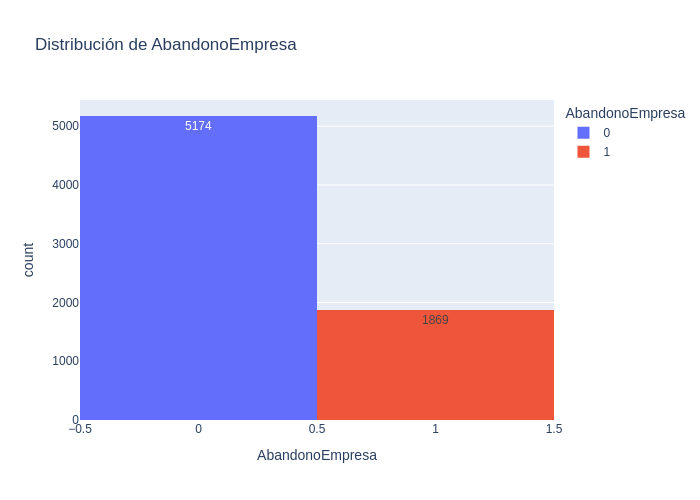

In [22]:
# Calculamos la distribución de Abandono empresa
fig = px.histogram(df_normalizado, x = 'AbandonoEmpresa', text_auto = True, color = 'AbandonoEmpresa', title = 'Distribución de AbandonoEmpresa')

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

##**Recuento de evasión por variables categóricas**

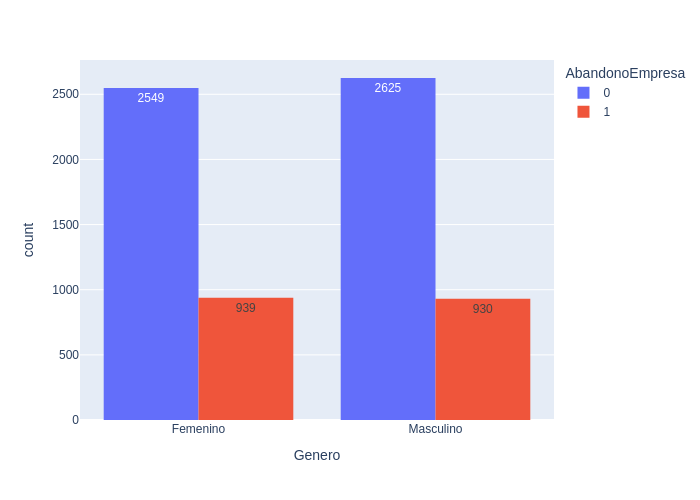

In [23]:
# Gráficamos la distribución de Abandono empresa por género
fig = px.histogram(df_normalizado, x = 'Genero', text_auto = True, color = 'AbandonoEmpresa', barmode = 'group')

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)


El análisis anterior mostró que la evasión es similar entre géneros. Como principiante en data science, considero que si un gráfico solo confirma que la proporción de abandono es similar para hombres y mujeres, podría considerarse redundante y no aporta un insight significativo para generar una desición estratégica, por lo tanto, no estará presente en el informe.

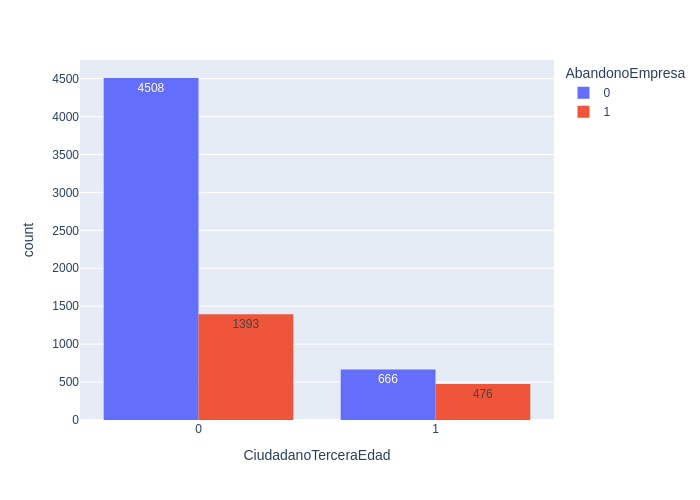

In [24]:
# Gráficamos la distribución de Abandono empresa por clientes mayores de 60 años
fig = px.histogram(df_normalizado, x = 'CiudadanoTerceraEdad', text_auto = True, color = 'AbandonoEmpresa', barmode = 'group')

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

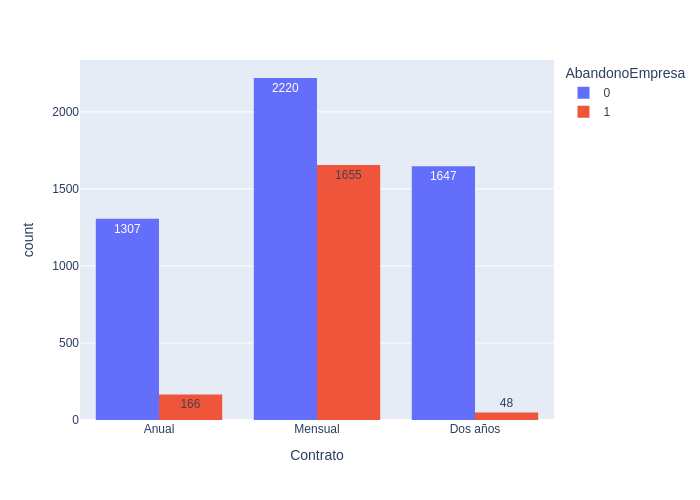

In [25]:
# Gráficamos la distribución de Abandono de empresa por el tipo de contrato
fig = px.histogram(df_normalizado, x = 'Contrato', text_auto = True, color = 'AbandonoEmpresa', barmode = 'group')

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

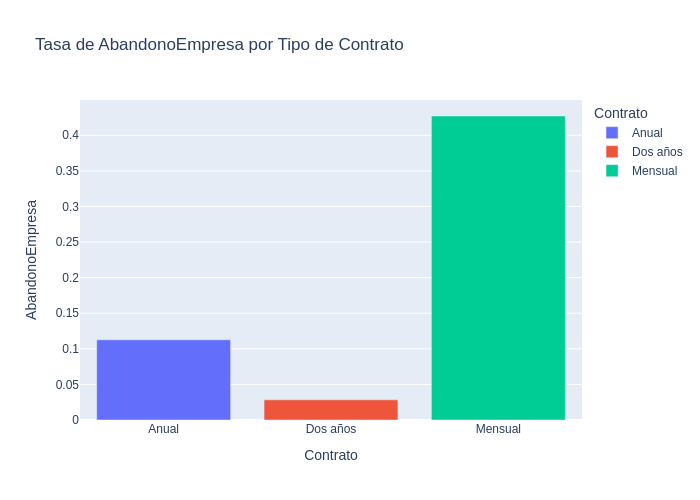

In [26]:
# Gráficamos la tasa de Abandono de empresa por el tipo de contrato
abandonoempresa_por_contrato = df_normalizado.groupby('Contrato')['AbandonoEmpresa'].mean().reset_index()

# Definimos un color por cada tipo de contrato
colors = {
    'Anual': '#1f77b4',
    'Dos años': '#2ca02c',
    'Mensual': '#bcbd22',
}

fig = px.bar(abandonoempresa_por_contrato,
             x='Contrato',
             y='AbandonoEmpresa',
             title='Tasa de AbandonoEmpresa por Tipo de Contrato',
             color='Contrato')

fig.show()
img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

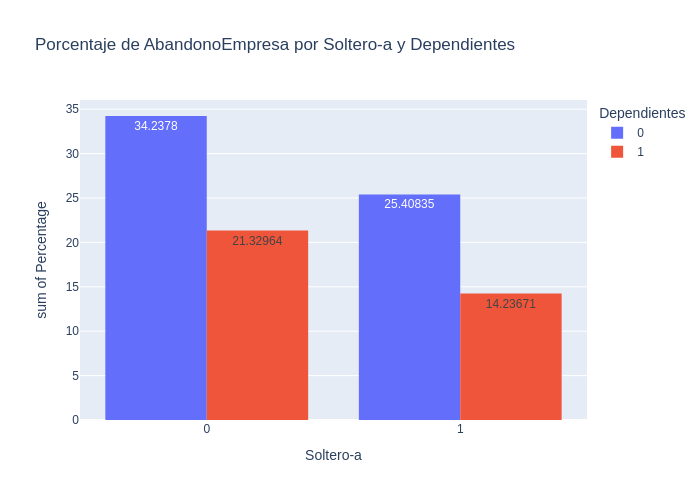

In [27]:
# Generamos histograma para contrastar el porcentaje de Abandono por 'Soltero-a' relacionado a los 'Dependiente'
# Agrupar por 'Soltero-a', 'Dependientes' y 'AbandonoEmpresa', luego calcular el tamaño del grupo
df_grouped = df_normalizado.groupby(['Soltero-a', 'Dependientes', 'AbandonoEmpresa']).size().reset_index(name='Count')

# Calcular el total de clientes por cada combinación de 'Soltero-a' y 'Dependientes'
df_grouped['Total'] = df_grouped.groupby(['Soltero-a', 'Dependientes'])['Count'].transform('sum')

# Calcular el porcentaje de AbandonoEmpresa para cada grupo
df_grouped['Percentage'] = (df_grouped['Count'] / df_grouped['Total']) * 100

# Filtrar solo las filas donde AbandonoEmpresa es 1 (Churn)
df_churn_percentage = df_grouped[df_grouped['AbandonoEmpresa'] == 1]

# Generar histograma usando los porcentajes calculados
fig = px.histogram(df_churn_percentage,
             x='Soltero-a',
             y='Percentage',
             color='Dependientes',
             barmode='group',
             text_auto=True, # Mostrar texto automáticamente en las barras
             title='Porcentaje de AbandonoEmpresa por Soltero-a y Dependientes'
            )
img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

- Los clientes que son solteros/as y no tienen dependientes, tienen el porcentaje más alto abandono entre todos los grupos

- Los clientes que son solteros/as y tienen dependientes, relativamente tambien tienen un alto porcentaje de abandono, sin embargo, ligeramente menor que aquellos que estan sin pareja y no tienen dependientes

- Los clientes que estan casados o viven en pareja y no poseen dependientes, tienen un porcentaje bajo de abandono comparado con los clientes solteros/as

- Los clientes que estan casados y tienen dependientes, representan el porcentaje más bajo de abandono entre todos los grupos

Esto sugiere que el ser soltero/ra, especialmente sin dependientes, esta asociado a una mayor probabilidad de abandono del servicio. Por lo contrario, estar casado, particularmente con dependientes, parece estar relacionado con tener un porcentaje bajo de abandono del servicio.

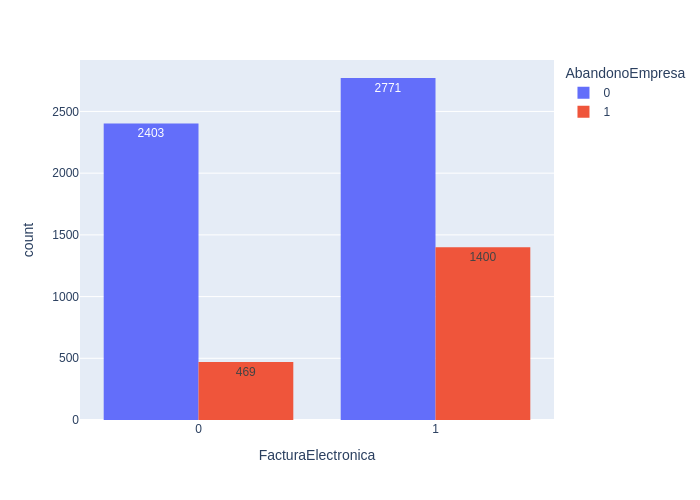

In [28]:
# Gráficamos la distribución de Abandono de empresa por el tipo de factura
fig = px.histogram(df_normalizado, x = 'FacturaElectronica', text_auto = True, color = 'AbandonoEmpresa', barmode = 'group')

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

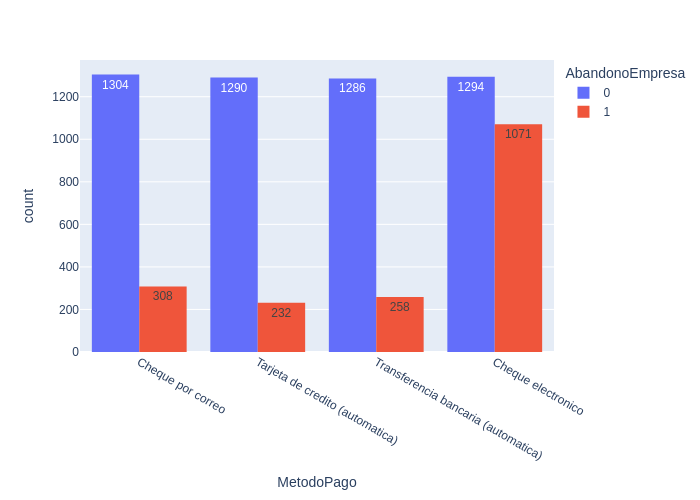

In [29]:
# Generamos histograma de para comparar el porcentaje de Abandono por 'MetodoPago'
fig = px.histogram(df_normalizado, x = 'MetodoPago',  text_auto = True, color = 'AbandonoEmpresa', barmode = 'group')

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

##**Conteo de evasión por variables de servicios y suscripciones**

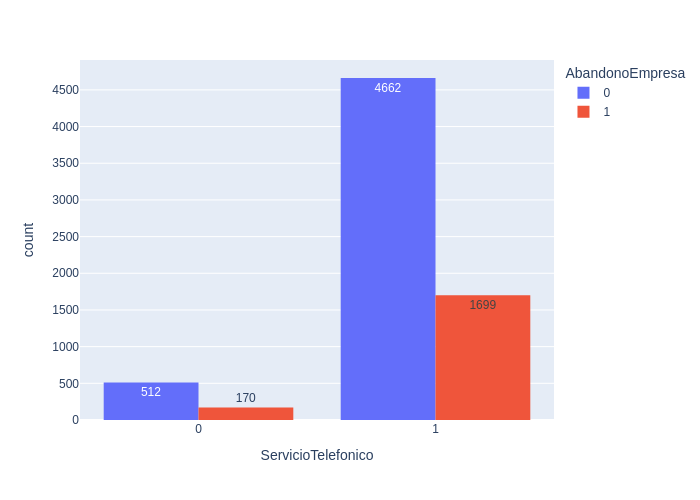

In [30]:
# Generamos histograma para comparar el porcentaje de Abandono por 'ServicioTelefonico'
fig = px.histogram(df_normalizado, x = 'ServicioTelefonico',  text_auto = True, color = 'AbandonoEmpresa', barmode = 'group')

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

'Este gráfico tampoco saldrá en el informe, no obstante, al igual que en caso anterior, se mantendrá en el código por motivos de historial'.

A diferencia del gráfico de "Abandono por género", en este gráfico de conteo para el servicio telefónico se puede observar un número muy alto de clientes suscritos al servicio (considerando que la mayoría de las empresas de telecomunicaciones ofrecen teléfono). Esto te diría que es un segmento grande. Sin embargo, el gráfico de tasa de abandono (que esta ubicado unos gráficos más abajo) para el servicio telefónico revelaría que, a pesar de ser un segmento grande, el porcentaje de clientes que abandonan es casi idéntico al de los clientes sin servicio telefónico, con tan solo 26.7% (suscrito) vs. 24.9% (no suscrito).

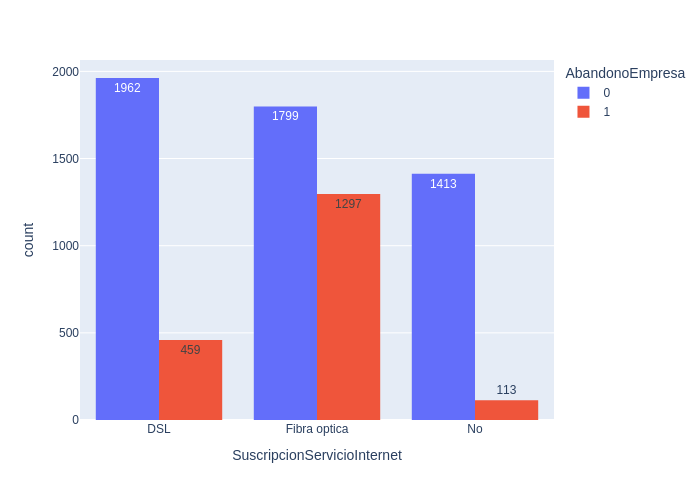

In [31]:
# Generamos histograma para comparar el porcentaje de Abandono por 'SuscripcionServicioInternet'
fig = px.histogram(df_normalizado, x = 'SuscripcionServicioInternet',  text_auto = True, color = 'AbandonoEmpresa', barmode = 'group')

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

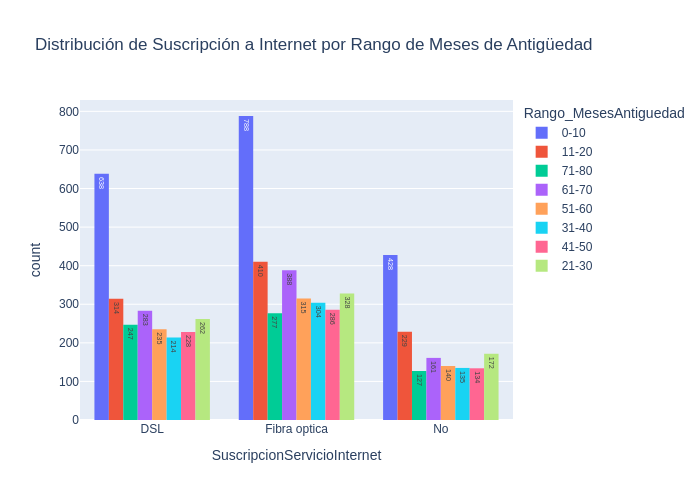

In [32]:
# Creamos una nueva columna para ordenar los rangos de 'MesesAntiguedad'
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df_normalizado['Rango_MesesAntiguedad'] = pd.cut(df_normalizado['MesesAntiguedad'], bins=bins, labels=labels, right=False)

# Generamos histograma para contrastar el porcentaje de Abandono por 'SuscripcionServicioInternet' relacionado a los rangos de 'MesesAntiguedad'
fig = px.histogram(df_normalizado, x = 'SuscripcionServicioInternet',  text_auto = True, color = 'Rango_MesesAntiguedad', barmode = 'group', title = 'Distribución de Suscripción a Internet por Rango de Meses de Antigüedad')

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

- Los nuevos clientes (0-10 meses) presentan una distribución equilibrada entre aquellos que no tienen acceso a Internet, los que utilizan DSL y los que cuentan con Fibra Óptica. Esto indica que están investigando diversas alternativas.
- Aquellos clientes intermedios (que llevan de 11 a 60 meses con el servicio) muestran un aumento notable en la cantidad de usuarios de Fibra Óptica. Esto sugiere que prefieren este tipo de servicio a medida que se convierten en clientes más estables.
- Los clientes que han estado con nosotros entre 61 y 80 meses muestran un uso más frecuente de DSL. Esto se debe a que estos clientes eligieron este servicio cuando era más popular y no han cambiado a tecnologías más modernas.
- La cantidad de clientes que no tienen servicio de Internet está disminuyendo con el tiempo, sobre todo entre los clientes intermedios. Esto tiene sentido porque aquellos que no utilizan Internet tienen menos razones para cambiar de proveedor.

En resumen, a medida que pasa el tiempo, se observa una inclinación hacia el uso de Fibra Óptica, especialmente durante los años intermedios. Esto muestra un cambio en las preferencias tecnológicas de los usuarios.

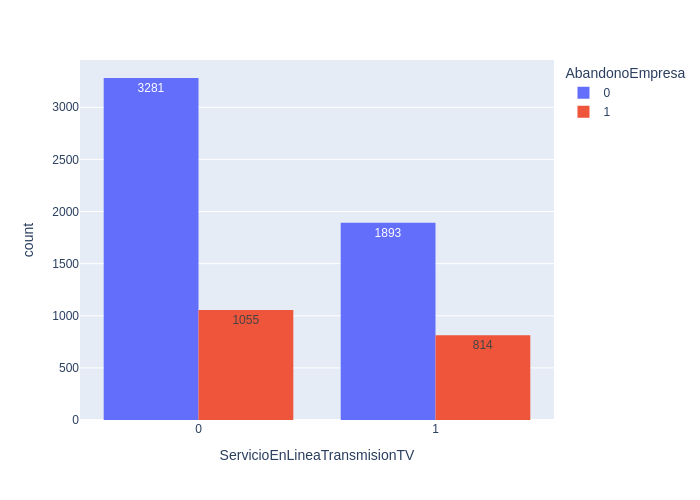

In [33]:
# Generamos histograma para comparar el porcentaje de Abandono por 'ServicioEnLineaTransmisionTV'
fig = px.histogram(df_normalizado, x = 'ServicioEnLineaTransmisionTV',  text_auto = True, color = 'AbandonoEmpresa', barmode = 'group')

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

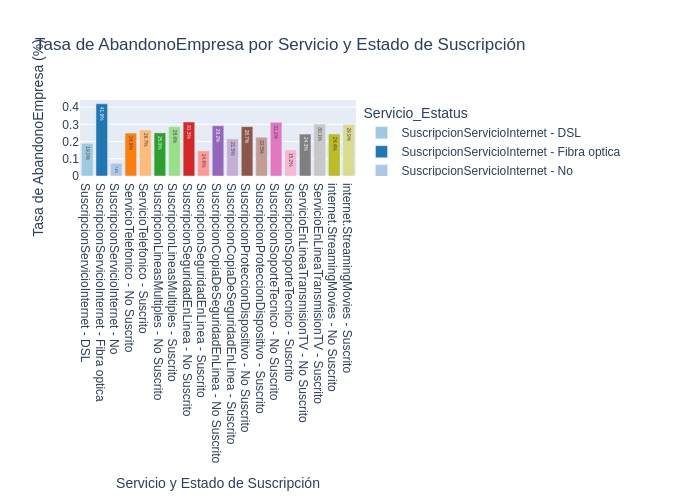

In [34]:
# Preparamos las columnas para comparar el porcentaje de Abandono por cada servicio y suscripción
servicio_abandono_rates = []
columnas_servicio = ['SuscripcionServicioInternet', 'ServicioTelefonico', 'SuscripcionLineasMultiples', 'SuscripcionSeguridadEnLinea', 'SuscripcionCopiaDeSeguridadEnLinea', 'SuscripcionProteccionDispositivo', 'SuscripcionSoporteTecnico', 'ServicioEnLineaTransmisionTV', 'internet.StreamingMovies']

for col in columnas_servicio:
    abandono_por_servicio = df_normalizado.groupby(col)['AbandonoEmpresa'].mean().reset_index()
    abandono_por_servicio['Servicio'] = col
    # Aseguramos que se esten usando las columnas elegidas en el mapa basado en los servicios seleccionados
    abandono_por_servicio['ServicioSuscripcion'] = abandono_por_servicio[col].map({0: 'No Suscrito', 1: 'Suscrito', 'DSL': 'DSL', 'Fibra optica': 'Fibra optica', 'No': 'No'})
    servicio_abandono_rates.append(abandono_por_servicio)

df_abandono_servicio = pd.concat(servicio_abandono_rates)

# Creamos una nueva columna que combine el estado de los servicios y suscripciones por barras individuales
df_abandono_servicio['Servicio_Estatus'] = df_abandono_servicio['Servicio'] + ' - ' + df_abandono_servicio['ServicioSuscripcion']

# Definimos un mapa de color por cada Estado_Servicio
colors = {
    'SuscripcionServicioInternet - No': '#aec7e8', # Light blue
    'SuscripcionServicioInternet - DSL': '#9ecae1', # Soft blue variant
    'SuscripcionServicioInternet - Fibra optica': '#1f77b4',  # Muted blue
    'ServicioTelefonico - No Suscrito': '#ff7f0e', # Muted orange
    'ServicioTelefonico - Suscrito': '#ffbb78',  # Light orange
    'SuscripcionLineasMultiples - No Suscrito': '#2ca02c', # Cooked asparagus green
    'SuscripcionLineasMultiples - Suscrito': '#98df8a', # Light green
    'SuscripcionSeguridadEnLinea - No Suscrito': '#d62728', # Brick red
    'SuscripcionSeguridadEnLinea - Suscrito': '#ff9896', # Light red
    'SuscripcionCopiaDeSeguridadEnLinea - No Suscrito': '#9467bd', # Muted purple
    'SuscripcionCopiaDeSeguridadEnLinea - Suscrito': '#c5b0d5', # Light purple
    'SuscripcionProteccionDispositivo - No Suscrito': '#8c564b', # Chestnut brown
    'SuscripcionProteccionDispositivo - Suscrito': '#c49c94', # Light brown
    'SuscripcionSoporteTecnico - No Suscrito': '#e377c2', # Raspberry yogurt pink
    'SuscripcionSoporteTecnico - Suscrito': '#f7b6d2', # Light pink
    'ServicioEnLineaTransmisionTV - No Suscrito': '#7f7f7f', # Middle gray
    'ServicioEnLineaTransmisionTV - Suscrito': '#c7c7c7', # Light gray
    'internet.StreamingMovies - No Suscrito': '#bcbd22', # Curry yellow-green
    'internet.StreamingMovies - Suscrito': '#dbdb8d',  # Blue-teal
}

# Creamos un gráfico de barras con barras individuales por cada servicio/suscripción y estatus
fig_servicios_individuales_flat = px.bar(df_abandono_servicio,
                                       x='Servicio_Estatus',
                                       y='AbandonoEmpresa',
                                       title='Tasa de AbandonoEmpresa por Servicio y Estado de Suscripción',
                                       text=[f'{val:.1%}' for val in df_abandono_servicio['AbandonoEmpresa']],
                                       color='Servicio_Estatus', # Use the new column for coloring
                                       color_discrete_map=colors # Map colors to Servicio_Estatus
                                      )


fig_servicios_individuales_flat.update_layout(yaxis_title='Tasa de AbandonoEmpresa (%)', xaxis_title='Servicio y Estado de Suscripción')
fig_servicios_individuales_flat.show()

img_bytes = pio.to_image(fig_servicios_individuales_flat, format='png')
Image(img_bytes)

Haciendo referencia al gráfico de "Género y Servicio Telefonico", estas dos primeras barras que representan a este último mencionado, también se mantendrán dentro gráfico, debido a que provee un historial general completo del análisis realizado y si un tercero desea consultar este código en el futuro, es importante que comprenda como se llego a las conclusiones e insights, y en consecuencia que datos se descartaron en el informe según su grado de relevancia.

##**Conteo de evasión por variables numéricas**

In [35]:
# Agrupar por MesesAntiguedad y Abandono de empresa
df_grouped = df_normalizado.groupby(['MesesAntiguedad', 'AbandonoEmpresa']).size().unstack(fill_value=0)

# Calculamos el porcentaje de AbandonoEmpresa por MesesAntiguedad
df_grouped['AbandonoEmpresa_rate'] = (df_grouped.get(1, 0) / df_grouped.sum(axis=1)) * 100

# Imprimimos el resultado
print(df_grouped[['AbandonoEmpresa_rate']])

AbandonoEmpresa  AbandonoEmpresa_rate
MesesAntiguedad                      
0                            0.000000
1                           61.990212
2                           51.680672
3                           47.000000
4                           47.159091
...                               ...
68                           9.000000
69                           8.421053
70                           9.243697
71                           3.529412
72                           1.657459

[73 rows x 1 columns]


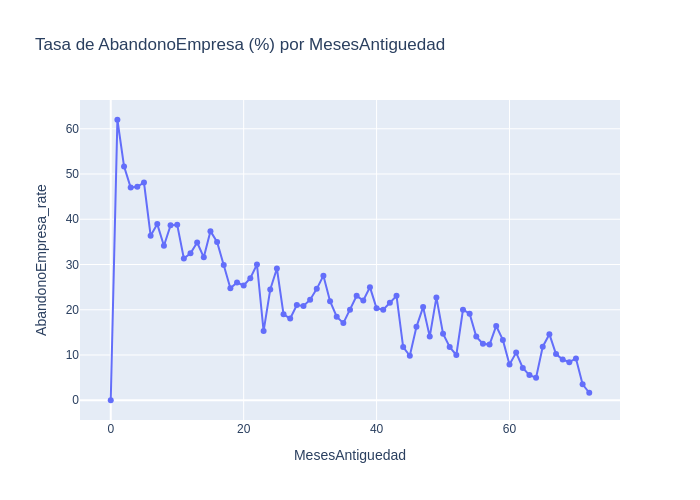

In [36]:
# Gráficamos la tasa de Abandono de empresa por los Meses de antiguedad
fig = px.line(df_grouped.reset_index(),
              x='MesesAntiguedad',
              y='AbandonoEmpresa_rate',
              markers=True,
              title='Tasa de AbandonoEmpresa (%) por MesesAntiguedad')
fig.show()
img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

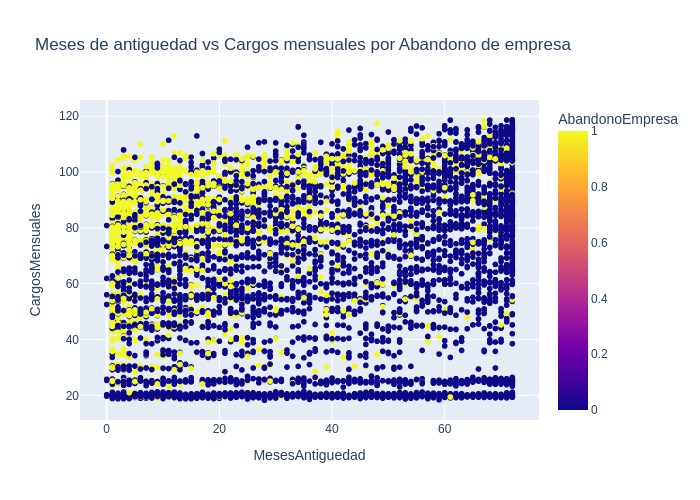

In [37]:
# Realizamos un gráfico de dispersión para contrarrestar las columnas de Meses de antiguedad con Cargos mensuales por el Abandono de empresa
fig = px.scatter(df_normalizado,
           x="MesesAntiguedad",
           y="CargosMensuales",
           color="AbandonoEmpresa",
           title="Meses de antiguedad vs Cargos mensuales por Abandono de empresa")

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

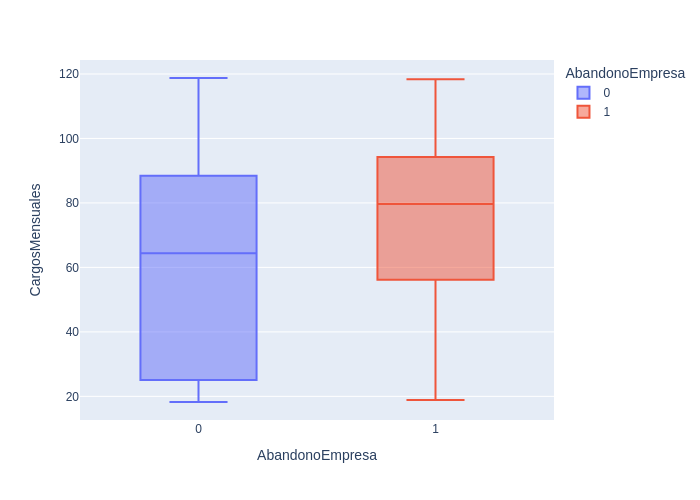

In [38]:
# Generamos boxplot de los Cargos mensuales en el Abandono de empresa
fig = px.box(df_normalizado, x = 'AbandonoEmpresa', y = 'CargosMensuales', color = 'AbandonoEmpresa')

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

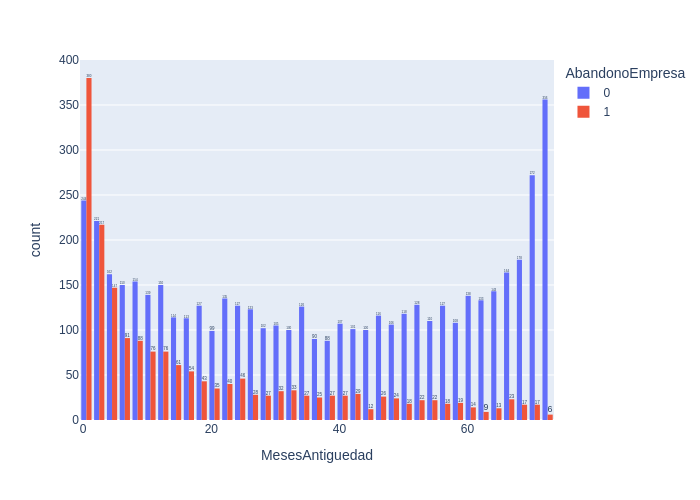

In [39]:
# Gráficamos la distribución de Abandono empresa por periodo de servicio contratado
fig = px.histogram(df_normalizado, x = 'MesesAntiguedad', text_auto = True, color = 'AbandonoEmpresa', barmode = 'group')

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

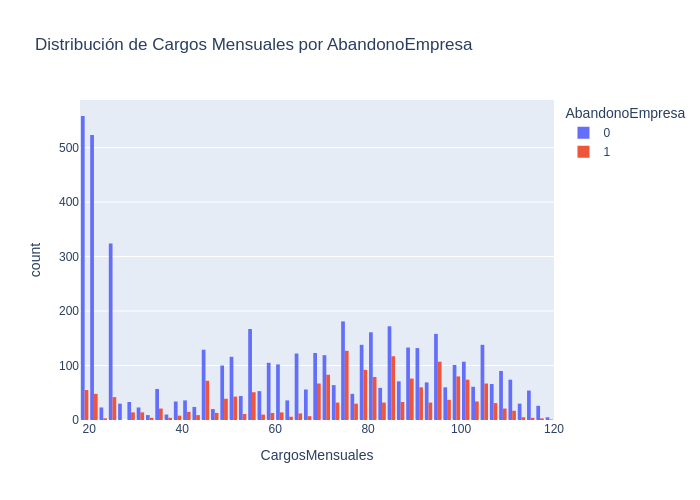

In [40]:
# Gráficamos la distribución de Cargos mensuales por Abandono de empresa
fig_monthly = px.histogram(df_normalizado,
                           x='CargosMensuales',
                           color='AbandonoEmpresa',
                           barmode='group',
                           title='Distribución de Cargos Mensuales por AbandonoEmpresa')
fig_monthly.show()

img_bytes = pio.to_image(fig_monthly, format='png')
Image(img_bytes)

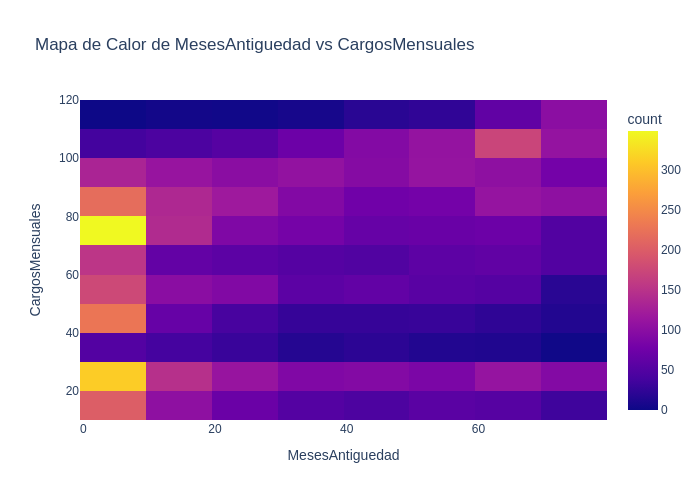

In [41]:
# Genera mapa de calor con MesesAntiguedad y CargosMensuales
fig_heatmap = px.density_heatmap(df_normalizado,
                                 x='MesesAntiguedad',
                                 y='CargosMensuales',
                                 title='Mapa de Calor de MesesAntiguedad vs CargosMensuales')
fig_heatmap
img_bytes = pio.to_image(fig_heatmap, format='png')
Image(img_bytes)

Con este gráfico se puede evidenciar que existe una correlación positiva entre un periodo corto de antiguedad del cliente y un cargo alto de mensualidad. Dado que ambas variables por separado muestran tendencias al momento de predecir abandono, por lo tanto se propone construir una nueva variable (columna) en función de estas dos (CargosMensuales_por_MesesAntiguedad).

In [42]:
# Creamos la interación entre ambas columnas: "CargosMensuales_por_MesesAntiguedad"
df_normalizado['CargosMensuales_por_MesesAntiguedad'] = df_normalizado['MesesAntiguedad'] * df_normalizado['CargosMensuales']

# Comprobamos la existencia de la nueva columna 'CargosMensuales_por_MesesAntiguedad)'
df_normalizado['CargosMensuales_por_MesesAntiguedad']

,CargosMensuales_por_MesesAntiguedad
0,590.40
1,539.10
2,295.60
3,1274.00
4,251.70
...,...
7262,716.95
7263,1872.20
7264,100.60
7265,4545.95


In [43]:
# Agrupamos por CargosMensuales_por_MesesAntiguedad y Abandono de empresa
df_grouped = df_normalizado.groupby(['CargosMensuales_por_MesesAntiguedad', 'AbandonoEmpresa']).size().unstack(fill_value=0)

# Calculamos el porcentaje de AbandonoEmpresa por CargosMensuales_por_MesesAntiguedad
df_grouped['Abandono_CargosMensuales_por_MesesAntiguedad_rate'] = (df_grouped.get(1, 0) / df_grouped.sum(axis=1)) * 100

# Imprimimos el resultado
print(df_grouped[['Abandono_CargosMensuales_por_MesesAntiguedad_rate']])

AbandonoEmpresa                      Abandono_CargosMensuales_por_MesesAntiguedad_rate
CargosMensuales_por_MesesAntiguedad                                                   
0.00                                                                               0.0
18.80                                                                              0.0
18.85                                                                             50.0
18.90                                                                              0.0
19.00                                                                              0.0
...                                                                                ...
8460.00                                                                            0.0
8467.20                                                                            0.0
8481.60                                                                          100.0
8510.40                                    

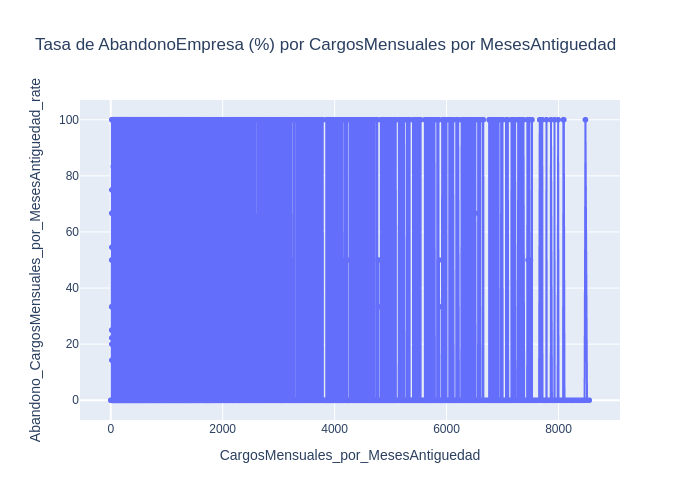

In [44]:
# Gráficamos la tasa de Abandono de empresa por la interacción de Cargos mensuales y Meses de antiguedad
fig = px.line(df_grouped.reset_index(),
              x='CargosMensuales_por_MesesAntiguedad',
              y='Abandono_CargosMensuales_por_MesesAntiguedad_rate',
              markers=True,
              title='Tasa de AbandonoEmpresa (%) por CargosMensuales por MesesAntiguedad')
fig.show()
img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

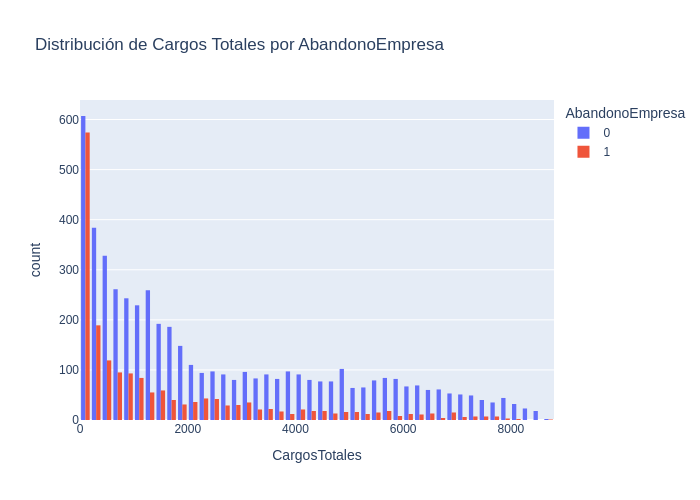

In [45]:
# Gráficamos la distribución de Cargos totales por Abandono de empresa
fig_total = px.histogram(df_normalizado,
                          x='CargosTotales',
                          color='AbandonoEmpresa',
                          barmode='group',
                          title='Distribución de Cargos Totales por AbandonoEmpresa')
fig_total.show()
img_bytes = pio.to_image(fig_total, format='png')
Image(img_bytes)

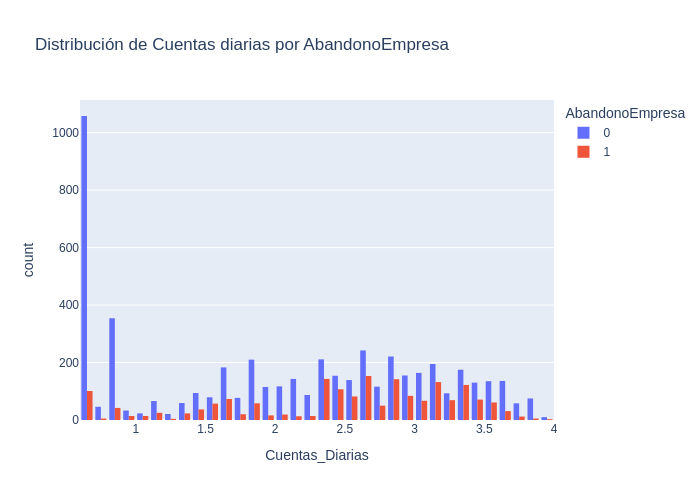

In [46]:
# Gráficamos la distribución de Cuentas diarias por Abandono de empresa
fig_total = px.histogram(df_normalizado,
                          x='Cuentas_Diarias',
                          color='AbandonoEmpresa',
                          barmode='group',
                          title='Distribución de Cuentas diarias por AbandonoEmpresa')
fig_total.show()
img_bytes = pio.to_image(fig_total, format='png')
Image(img_bytes)

#📄Informe final


🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.


##**🔹Introducción**

El propósito de este estudio es identificar y comprender cuales son las causas o motivos principales que conducen al abandono voluntario del servicio que provee la empresa de telecomunicaciones "Telecom X". A continuación, veremos como a partir de un proceso de extracción, análisis exploratorio y visualizaciones es posible detectar patrones e insights en los datos, que nos sirvan para entregar recomendaciones que sirvan de solución a la evasión de clientes (abandono de empresa) qué es un desafío y amenaza significativa para la sostenibilidad y rentabilidad de las empresas de telecomunicaciones.

##**🔹Limpieza y tratamiento de datos**

Para esta primera parte de procesamiento y preparación de datos se consideraron los siguientes pasos:

1.   **Normalización y estructuración de los datos:** Para comenzar los datos anidados en formato JSON fueron en primer lugar normalizados y luego transformados en una estructura tabular plana para una mejor visualización de los datos.

2.   **Manipulación de valores faltantes e inconsistencias:** Se encontraron y eliminaron filas con valores en blanco o inconsistentes en columnas clave como 'CargosTotales' y 'AbandonoEmpresa'.

3.   **Conversión de tipos de datos:** Las columnas numéricas se convirtieron al tipo de dato apropiado("float"), y las variables categóricas 'Yes'/'No' se transformaron a formato binario (1/0).

4.   **Solicitud columna nueva:** Se generó una nueva columna, 'Cuentas_Diarias', para un análisis posterior más detallado de los costos.

5.   **Estandarización y traducción:**  Las columnas y sus valores absolutos fueron renombrados y traducidos del inglés al español para mayor claridad y consistencia en el análisis.




##**🔹Análisis exploratorio de datos**

Se realizaron diversos análisis con cada uno de los elementos del Data Frame para identificar patrones e insights claves con la evasión de clientes. (Las representaciones graficas confirmaron los siguientes hallazgos):

- **Tasa general de Abandono de empresa**: La empresa presenta una tasa de abandono del **26.5%**.

- **Antigüedad del cliente**: Los clientes con menor tiempo de contrato, especialmente hasta los **primeros 10 meses**, son potencialmente más propensos a abandonar el servicio.

- **Antigüedad por cargos mensuales**: Clientes que han estado por un largo tiempo con la empresa y pagan altos cargos mensuales presentan una baja tasa de abandono. Por otro lado, los nuevos clientes o que llevan menos tiempo con la empresa y que pagan altos cargos mensuales demuestran una tasa de abandono superior.

- **Tipo de contrato**: Los contratos **mensuales** tienen una tasa de abandono notablemente más alta con un total de **42.7%** en comparación con los contratos anuales o de dos años, que muestran tasas de abandono significativamente menores con 11.3% y 2.8% respectivamente.

- **Servicio de internet**: Los clientes con Fibra Óptica presentan la tasa de abandono más alta (41.9%), mientras que aquellos sin servicio de internet tienen la tasa más baja (7.4%).

- **Método de pago**: El "Cheque electrónico" es el método de pago con la tasa de abandono más alta con un **45.3%**. En contraste los otros métodos la cifra desciende considerablemente rondando entre el 15% - 20%.

- **Factura electrónica**: Ligeramente similar al punto anterior los clientes que utilizan factura electrónica muestran una mayor tendencia a la evasión con 42.4%.

- **Estructura familiar**: Haciendo un cruce de columnas (solteros/as y dependientes), los clientes solteros/as sin dependientes son el segmento con mayor porcentaje de abandono con 34.2%, en cambio, los clientes casados/as con dependientes muestran la menor tasa de 14.2%.

- **Ciudadanos de tercera Edad**: Los clientes +65 años (CiudadanoTerceraEdad = 1) tienen una mayor inclinación al abandono de empresa con **46.8%**.

- **Servicios y suscripciones adicionales**: La ausencia de servicios adicionales (como seguridad, copia de seguridad, protección de dispositivo, soporte técnico, streaming de TV/películas) se correlaciona con tasas de abandono más altas, dentro de las que más destacan están relacionadas a la protección del servicio con un porcentaje que alcanza un 31.3% (Seguridad en línea).

##**🔹Conclusiones e insights**

Los elementos que más influyen en la cancelación de clientes en "Telecom X" son:


- **Tipo de contrato**: Quienes tienen el contrato de tipo mensual son un fuerte candidato de abandono.

- **Pagos y antigüedad**: Un bajo valor en la interacción (CargosMensuales_por_MesesAntiguedad) que puede estar determinado por un corto tiempo de contrato o altos costos mensuales o bien una combinación de ambos, está relacionado a una alta tasa de abandono de empresa. Por lo tanto, tanto nuevos clientes como aquellos con un corto tiempo de contrato representan  un perfil de alto riesgo en evasión.

- **Servicio de internet y método de pago**: Aquellos que utilizan fibra óptica y el pago con cheque electrónico están asociados con alta evasión.

- **Demografía y servicios complementarios**: Clientes de la tercera edad, solteros sin dependientes, y aquellos sin servicios adicionales de internet, tienen más probabilidades de cancelar.

- **Facturación**: Los clientes que reciben la factura de en formato electrónico se asocia a una mayor tasa de churn.

Estos hallazgos son de suma importancia para localizar al segmento de afiliados que están pronto a abandonar y diseñar acciones específicas para revertirlo.

##**🔹Recomendaciones**

Basado en el estudio anterior realizado, a continuación, se sugieren las siguientes estrategias y acciones tentativas para reducir el índice de evasión de clientes:

- **Estrategias de retención temprana**: Aplicar programas proactivos para clientes recién ingresados o a pocos meses de su entrada, con ofertas y planes de bienvenida, soporte personalizado y encuestas de satisfacción al cliente tempranas para abordar problemas antes de que evolucionen negativamente.

- **Incentivos para contratos a largo plazo**: Incentivar la migración de contratos mensuales a planes anuales o de dos años a partir de descuentos, mejoras de servicios/suscripciones o beneficios exclusivos, para de esta forma incrementar la lealtad.

- **Optimización del servicio de fibra óptica**: Investigar las causas subyacentes de la alta evasión en clientes de fibra óptica mediante encuestas enfocadas a ranquear el rendimiento (calidad de servicio, precio, soporte) y posteriormente realizar mejoras dirigidas inicialmente gratuitas.

- **Revisión de métodos de pago**: Evaluar la experiencia del cliente con el método "Cheque electrónico" para identificar posibles errores de funcionamiento, por otro lado, fomentar activamente la utilización de métodos de pago automáticos, (tarjeta de crédito/transferencia bancaria) puesto que demuestran menor churn.

- **Mejora de la experiencia de factura electrónica**: Cerciorarse de que la plataforma de factura electrónica sea intuitiva, responsiva, accesible y sin complicaciones para reducir puntos de fricción que pueden estar conduciendo al abandono.

- **Programas de lealtad segmentados**: Formular acciones y estrategias de remarketing  específicas para clientes solteros/as sin dependientes y ciudadanos de la tercera edad, adaptando dentro de lo posible los beneficios a sus necesidades.

- **Promoción de servicios adicionales**: Resaltar el valor y los beneficios de los servicios adicionales de internet. Se pueden considerar paquetes o pruebas gratuitas para aumentar la aceptación, dado que estos servicios incrementan la retención.